# Optical Flow

**Optical flow** is a technique used to detect the motion of objects between consecutive frames of an image sequence. It is used to track how points in an image move over time, such as from one frame to another. In this notebook, we explore both **sparse** and **dense** optical flow methods.

---

## Sparse Optical Flow

Sparse optical flow tracks a set of specific feature points (such as corners or edges) across multiple frames. In this notebook, we use **Lucas-Kanade** sparse optical flow method to track features between two images.

### Key Steps:
1. **Feature Detection**: Use `cv2.goodFeaturesToTrack` to identify key points in the first image. These points are then tracked across the second image.
   - **Parameters**: 
     - `maxCorners`: Maximum number of corners to return.
     - `qualityLevel`: Minimum accepted quality of image corners.
     - `minDistance`: Minimum possible Euclidean distance between the returned corners.
  
2. **Optical Flow Calculation**: Use `cv2.calcOpticalFlowPyrLK` to calculate how the detected features move between the two images.
   - **Parameters**:
     - `prevImg`: The first image (grayscale).
     - `nextImg`: The second image (grayscale).
     - `prevPts`: The points in the first image to track.
     - `nextPts`: Calculated positions of those points in the second image.
     - `status`: Status array indicating whether the flow for each point was found.
     - `error`: Optional array containing the error for each point.
   
3. **Visualization**: Draw lines between the initial and final positions of the tracked points to visualize the movement between frames. Only points that moved beyond a certain threshold are shown.

---

## Dense Optical Flow

Dense optical flow calculates the flow for every pixel in the image. This method is more computationally expensive but provides more information about the entire scene's motion, not just selected features.

### Key Steps:
1. **Optical Flow Calculation**: Use `cv2.calcOpticalFlowFarneback` to compute the dense optical flow between two consecutive frames.
   - **Parameters**:
     - `prevImg`: First image (grayscale).
     - `nextImg`: Second image (grayscale).
     - `pyr_scale`: Parameter to specify the image scale (< 1) to create the image pyramid for motion estimation.
     - `levels`: Number of pyramid layers.
     - `winsize`: Averaging window size.
     - `iterations`: Number of iterations at each pyramid level.
     - `poly_n`: Size of the pixel neighborhood.
     - `poly_sigma`: Gaussian standard deviation for the neighborhood.
     - `flags`: Optical flow estimation options.
   
2. **Flow Representation**: Convert the optical flow vectors to polar coordinates (magnitude and angle) using `cv2.cartToPolar`.
   - **Magnitude**: Represents the flow speed or intensity.
   - **Angle**: Represents the direction of flow.

3. **Visualization**: Create an HSV image where:
   - The **hue** represents the angle of the flow (direction).
   - The **saturation** is set to maximum to represent the intensity.
   - The **value** represents the magnitude (strength) of the flow.

The result is converted to BGR format and displayed as a color-coded representation of the optical flow, where different colors represent different directions and intensities of movement.

---

### Key Functions:
- **`cv2.goodFeaturesToTrack`**: Detects features (corners) in the image that can be tracked.
- **`cv2.calcOpticalFlowPyrLK`**: Tracks the movement of the detected features across two frames.
- **`cv2.calcOpticalFlowFarneback`**: Computes dense optical flow across the entire image.
- **`cv2.cartToPolar`**: Converts Cartesian coordinates (x, y) to polar coordinates (magnitude, angle) for visualization.

---

## Exercise 4a:
In this exercise, modify the code to display only the keypoints that have moved significantly between the two images. Use a distance threshold to filter out the points that haven’t moved.

## Exercise 4b:
For dense optical flow, create a visual representation of the flow vectors. You can use a color-coded approach where the direction and magnitude of flow are represented by the hue and value in an HSV image.


# Optical Flow
## Sparse Optical Flow

As always start by importing the relevant packages.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Load the images `OF1.jpg` and `OF2.jpg` and change them to grayscale.

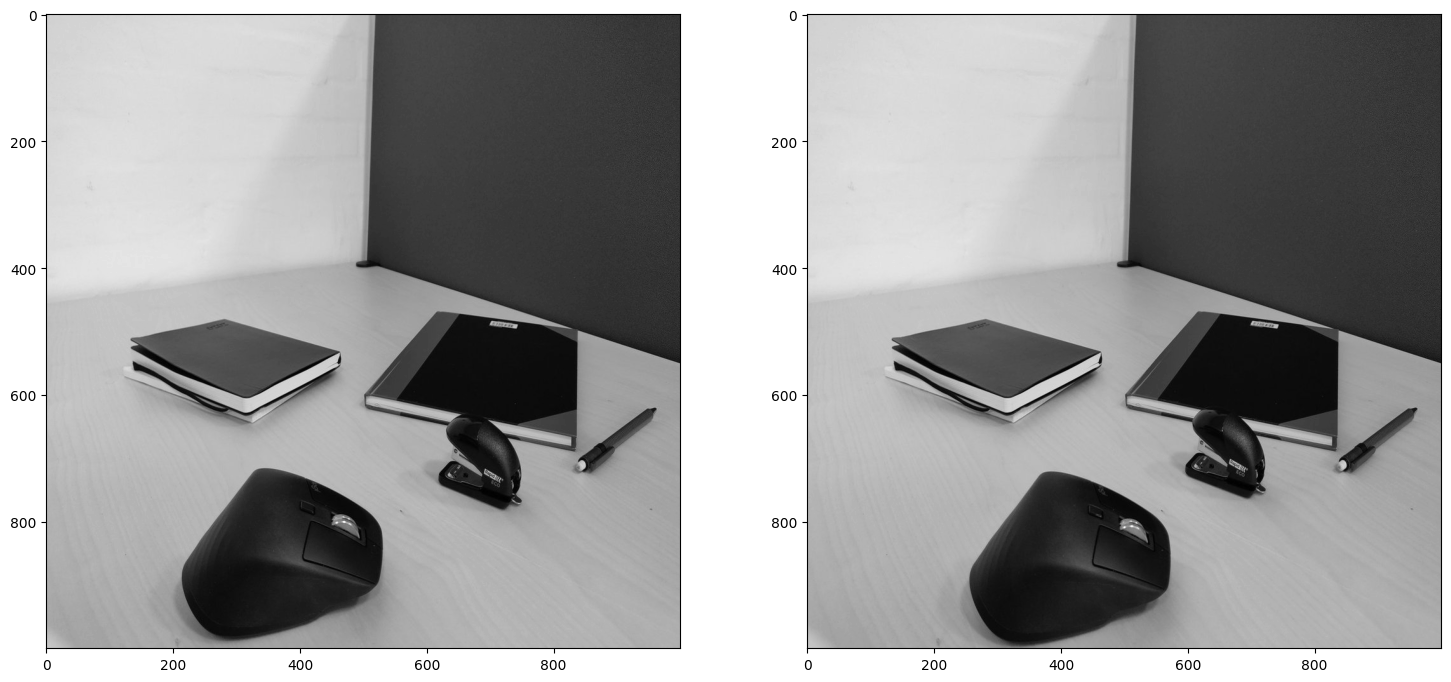

In [2]:
img1 = cv2.imread('OF1.jpg')
img2 = cv2.imread('OF2.jpg')

b,g,r = cv2.split(img1) # Changing the order from bgr to rgb so that matplotlib can show it
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(img2) # Changing the order from bgr to rgb so that matplotlib can show it
img2 = cv2.merge([r,g,b])

gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (18,18))
plt.subplot(1,2,1)
plt.imshow(gray1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(gray2, cmap = 'gray')

They look pretty much the same. We can now use optical flow to find out how the objects in the picutures have moved. We do this by first using [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541) to find features in the first image. You can play around with the parameters to see the difference.

In [3]:
feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)

Next we use the function [`cv2.calcOpticalFlowPyrLK`](https://docs.opencv.org/4.7.0/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323) to track the features in the next image.

In [4]:
feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)

We now have the location of the features from the first image in the second image. To find the movement, we can draw a line between the keypoints.

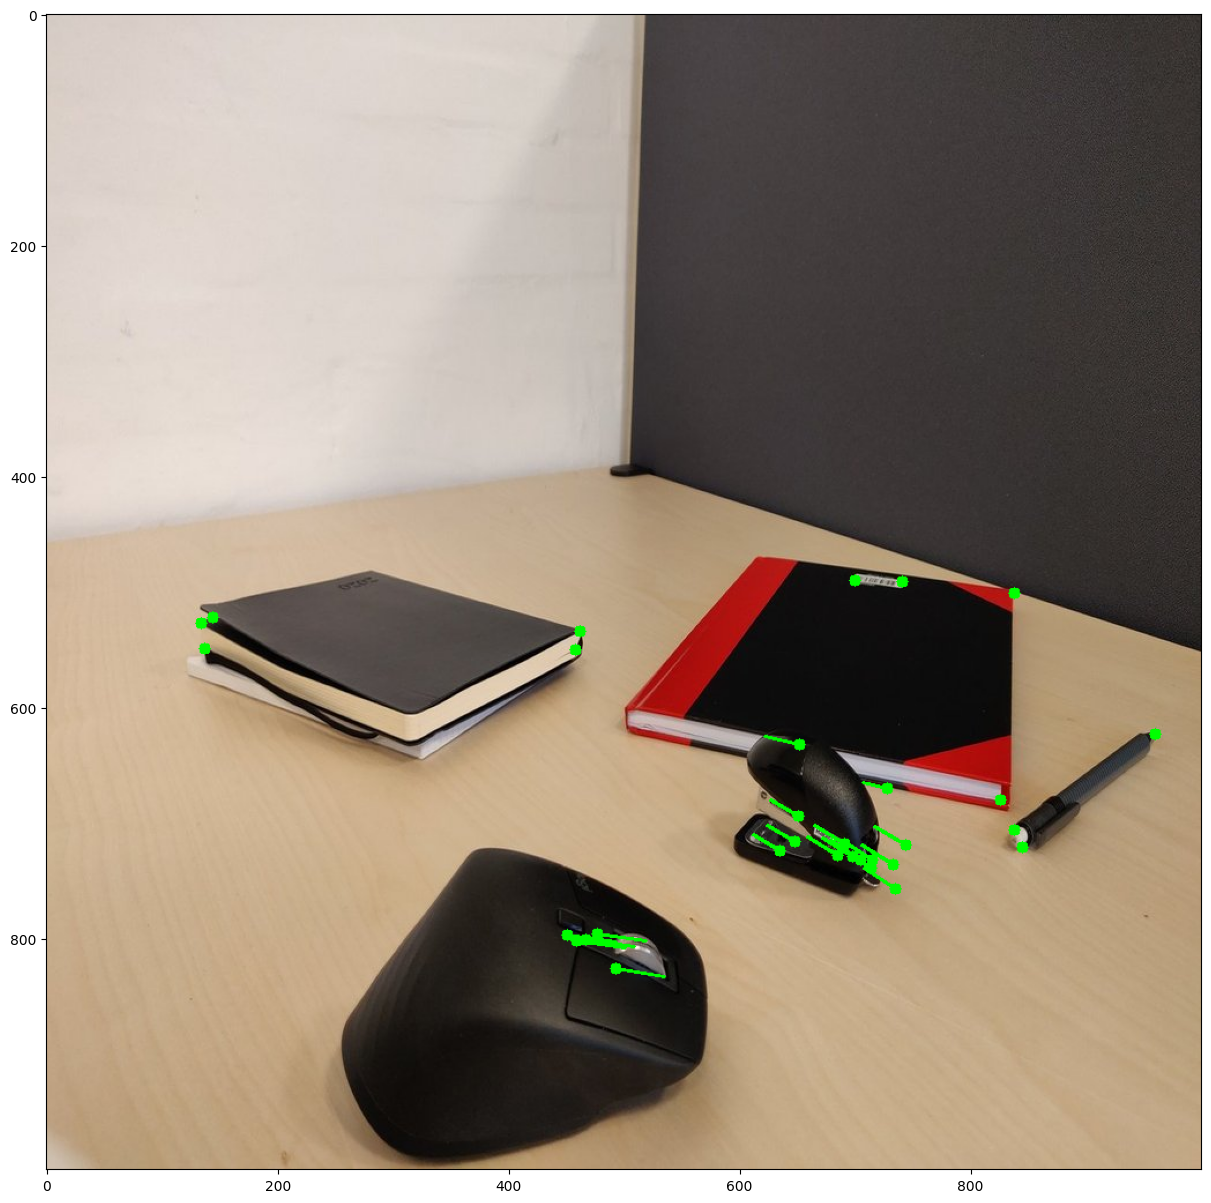

In [5]:
for i in range(len(feat1)):
    f10=int(feat1[i][0][0])
    f11=int(feat1[i][0][1])
    f20=int(feat2[i][0][0])
    f21=int(feat2[i][0][1])
    cv2.line(img2, (f10,f11), (f20, f21), (0, 255, 0), 2)
    cv2.circle(img2, (f10, f11), 5, (0, 255, 0), -1)

plt.figure(figsize=(15,15))
plt.imshow(img2)

## Exercise 4a
Change the code such that only the keypoints that have moved will be showed in the image.


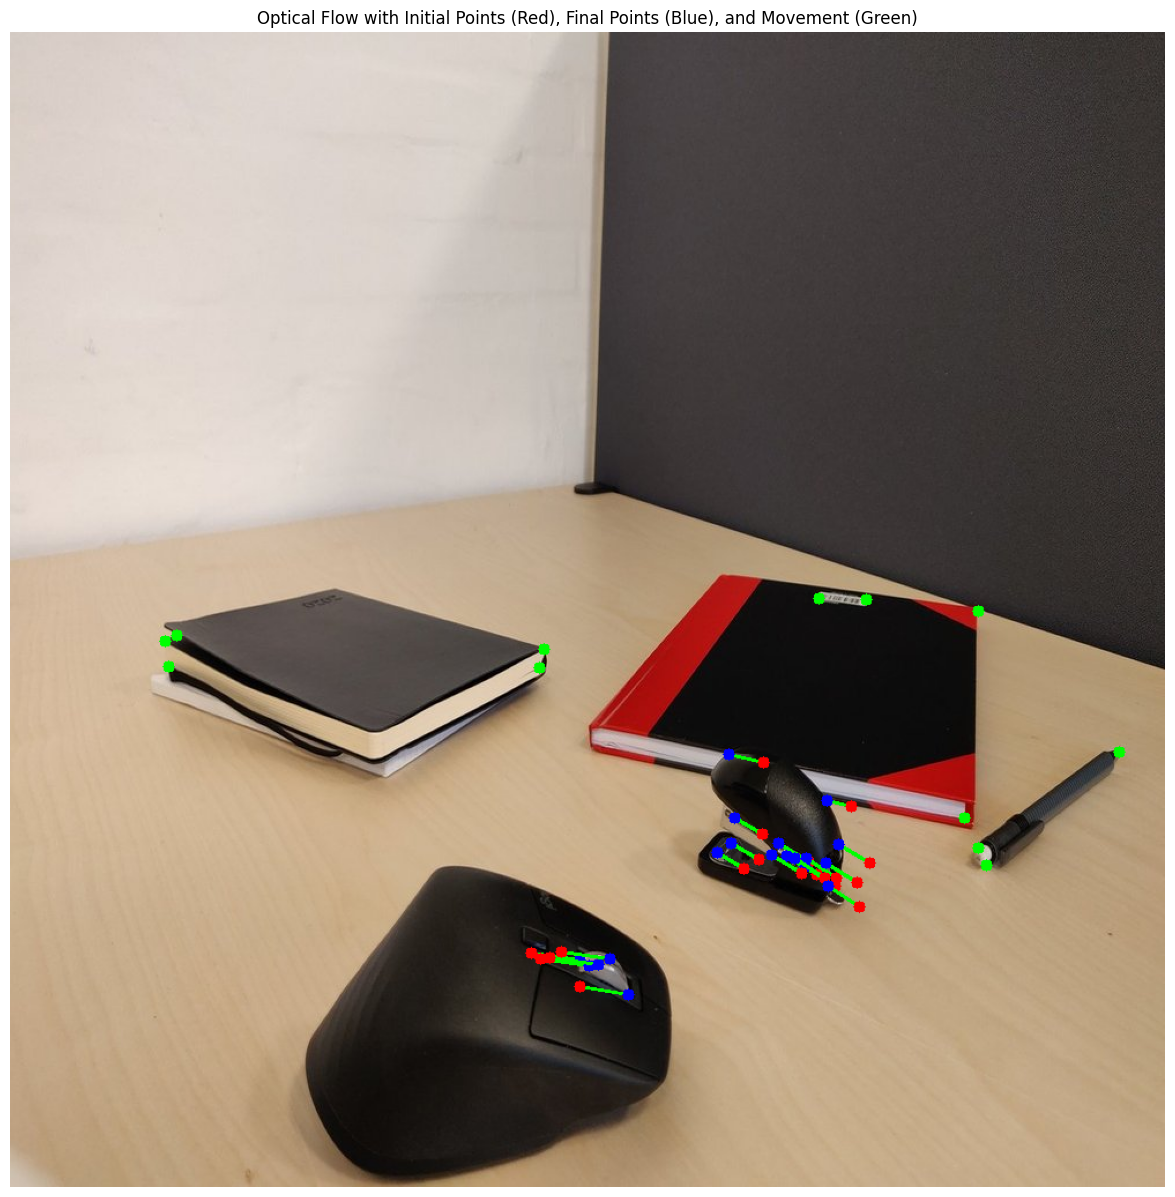

In [6]:
# Define a distance threshold (you can adjust this value)
distance_threshold = 5  # Change this to your preferred threshold value

# Detect good features to track in the first image
feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)

# Track the features in the second image using optical flow
feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)

# Make a copy of the second image to draw the moved keypoints
img2_moved = img2.copy()

# Draw only the keypoints that have moved beyond the defined threshold
for i in range(len(feat1)):
    # Check if the keypoint was successfully tracked and if it has moved
    if status[i] == 1:  # The feature was successfully tracked
        f10, f11 = feat1[i][0]  # Coordinates in the first image
        f20, f21 = feat2[i][0]  # Coordinates in the second image
        
        # Calculate the movement distance (Euclidean distance)
        movement_distance = np.linalg.norm([f10 - f20, f11 - f21])
        
        # Only draw if the movement distance is greater than the defined threshold
        if movement_distance > distance_threshold:
            # Draw a line to show movement
            cv2.line(img2_moved, (int(f10), int(f11)), (int(f20), int(f21)), (0, 255, 0), 2)  # Green line for movement
            # Draw the initial point in red
            cv2.circle(img2_moved, (int(f10), int(f11)), 5, (255, 0, 0), -1)  # Red for initial point
            # Draw the final point in blue
            cv2.circle(img2_moved, (int(f20), int(f21)), 5, (0, 0, 255), -1)  # Blue for final point

# Plot the image
plt.figure(figsize=(15, 15))
plt.imshow(img2_moved)
plt.title('Optical Flow with Initial Points (Red), Final Points (Blue), and Movement (Green)')
plt.axis('off')  # Hide axis for better clarity
plt.show()


## Dense Optical Flow
The sparse optical flow finds the flow of the detected keypoints. We will now try to use dense optical flow which, finds the flow of all the points in the picture. 
For this example we use the same two images, so we don't have to load them again. To find the optical flow, we use the function [`cv2.calcOpticalFlowFarneback`](https://docs.opencv.org/4.7.0/dc/d6b/group__video__track.html#ga5d10ebbd59fe09c5f650289ec0ece5af). Check out the description to see what all the different parameters do, and try to change them to see the difference.

In [7]:
flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.5, 0)

The function returns an array containing the flow vector for every pixel. This can be changed to a magnitude and an angle using the function [`cv2.cartToPolar`](https://docs.opencv.org/4.7.0/d2/de8/group__core__array.html#gac5f92f48ec32cacf5275969c33ee837d). 

# Exercise 4b
Find a way to represent the flow in the image, for example, by drawing vectors the relevant places or by making a new image with colors representing the flow of every pixel. An example of retrieving the magnitude and angle is shown below, which you can use if you like. 

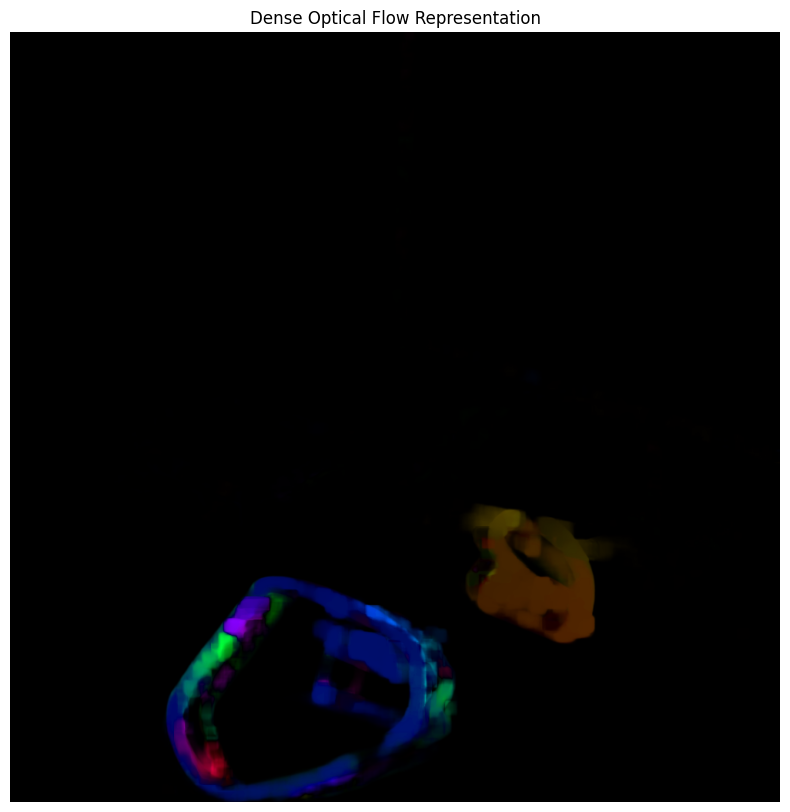

In [8]:
# Calculate the magnitude and angle of the optical flow
mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1])

# Create an HSV image where:
# - Hue corresponds to the angle of the flow (direction)
# - Saturation is set to maximum (255) to fully represent the flow
# - Value corresponds to the magnitude of the flow (strength/intensity)

hsv = np.zeros_like(img1)
hsv[..., 1] = 255  # Set saturation to maximum

# Normalize the angle to fit in the [0, 180] range of the hue channel (since OpenCV hue is in [0, 180])
hsv[..., 0] = ang * 180 / np.pi / 2

# Normalize the magnitude to fit in the [0, 255] range of the value channel
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

# Convert HSV image to BGR format for display
flow_bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display the optical flow result
plt.figure(figsize=(10, 10))
plt.imshow(flow_bgr)
plt.title('Dense Optical Flow Representation')
plt.axis('off')  # Turn off axis for clarity
plt.show()

